In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("bank-marketing.csv")

In [4]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.tail()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,120000,married,secondary,yes,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
data.shape

(45211, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [8]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Describe the pdays column, make note of the mean, median and minimum values. Anything 
### fishy in the values?

In [9]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### we can see above that many values is -1.
#### We can see that 75% values of pdays are -1. 
#### So -1 has special meaning over here ie previous campaign was made to them or not. 
#### So in our case if we want to make decision on customer who did have campaign previously,
#### then we must exclude all the cases of -1.
#### So, by doing this we can get to customer who had previously campaign.

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How 
### different are the mean and the median values?

In [10]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

pdays uses -1 as not value.These value as missing

Ignore these values in our mean/median calculations.
Keep it NaN
,So pdays is -1, replace with NaN

In [11]:
data.drop(data[data["pdays"] < 0].index,inplace=True)

In [12]:
data.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#### This time mean and median has changed significantly because we removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [13]:
data.groupby("education")["balance"].median()

education
primary      520.0
secondary    527.0
tertiary     775.0
unknown      782.0
Name: balance, dtype: float64

<AxesSubplot:ylabel='education'>

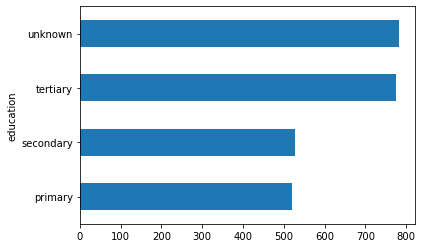

In [14]:
data.groupby("education")["balance"].median().plot.barh()

#### Thus, we can conclude from graph that customer with tertiary level of education has highest median value for balance.

### Make a box plot for pdays. Do you see any outliers?

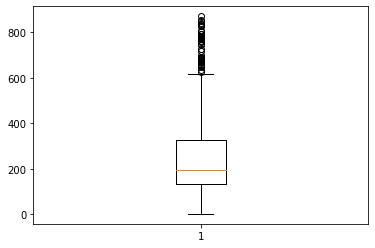

In [15]:
plt.boxplot(data["pdays"])
plt.show()

#### By the above box plot we can see that there are outliers present in pdays.

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. So performing bi-variate analysis to identify the features that are directly associated with the target variable.
### Bi- variate Analysis
### Converting the response variable to a convenient form

In [16]:
data.response.value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [17]:
data.replace({"response" : {"yes":1, "no":0}},inplace=True)

In [18]:
data.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

### Make suitable plots for associations with numerical features and categorical features

In [19]:
obj_col=[]
num_col=[]
for col in data.columns:
    if data[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [20]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


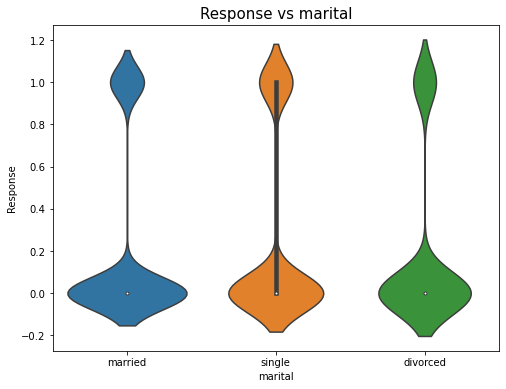

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


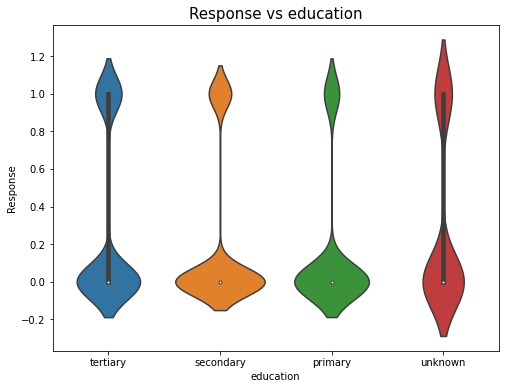

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


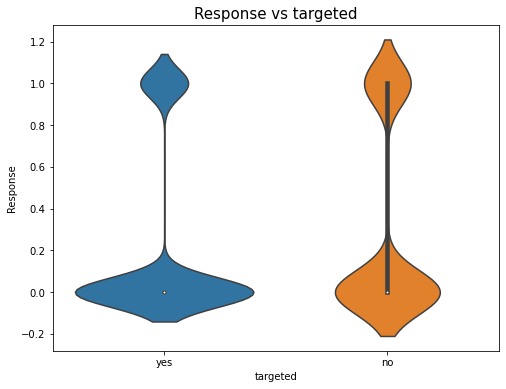

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


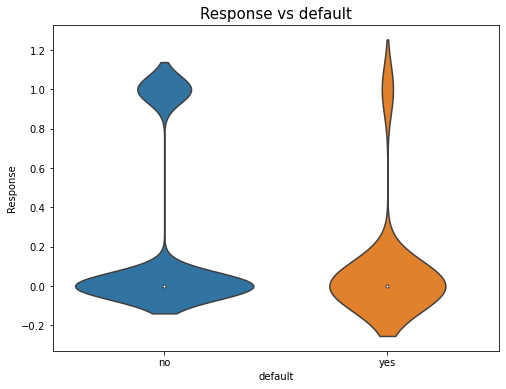

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


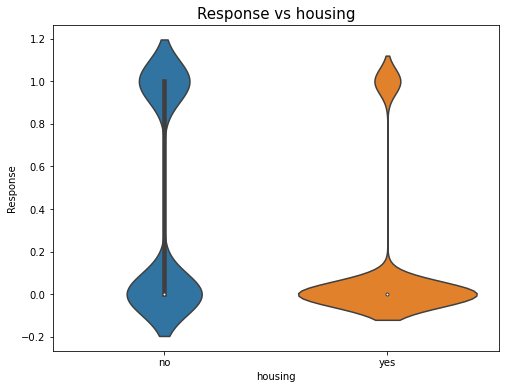

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


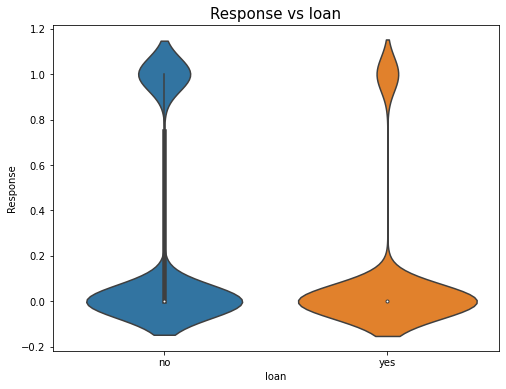

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


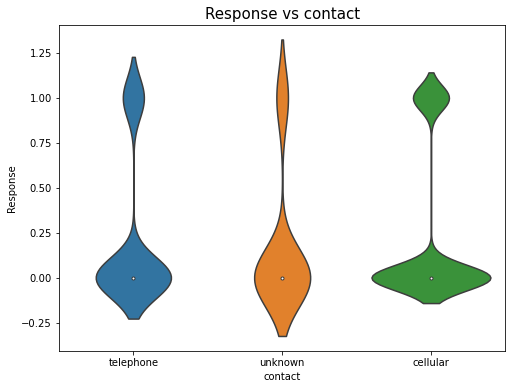

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


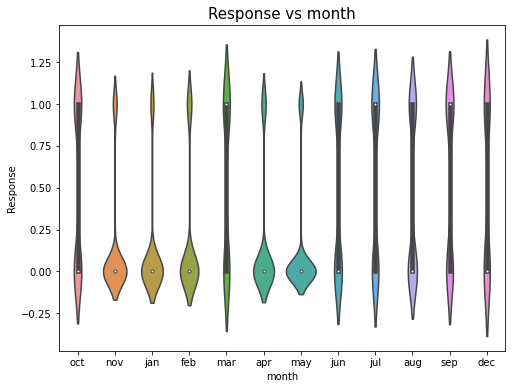

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


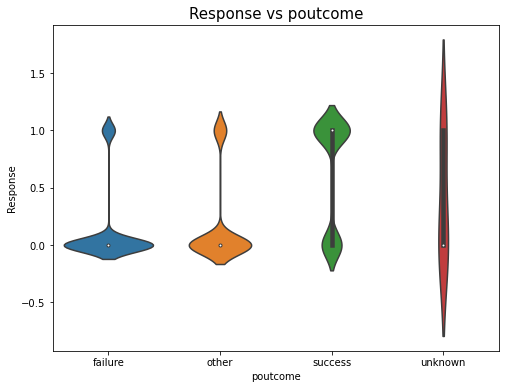

In [21]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(data[col],data["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

<AxesSubplot:>

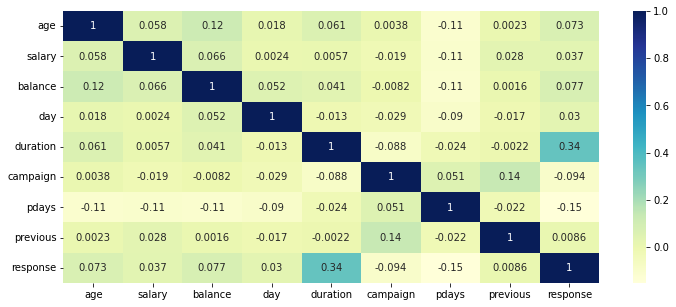

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),
           cbar=True,
           cmap='YlGnBu',
           annot=True,
           lw=0,
           linecolor='Grey')

#### we can see that duration variable is highly correlated with response variable and pdays variable is not highly correlated with response variable

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

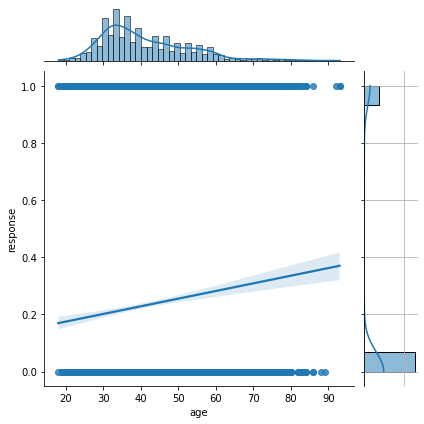

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

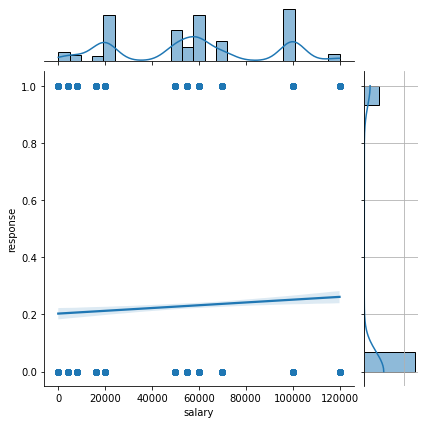

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

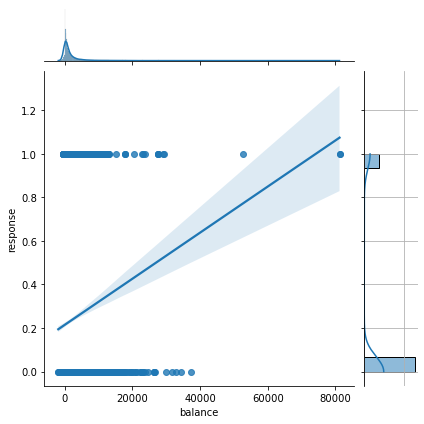

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

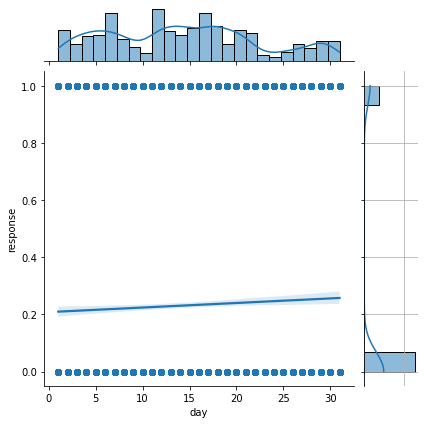

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

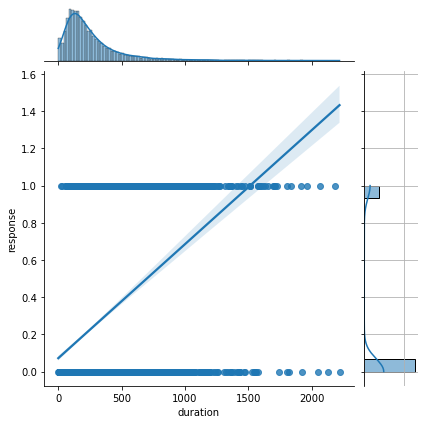

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

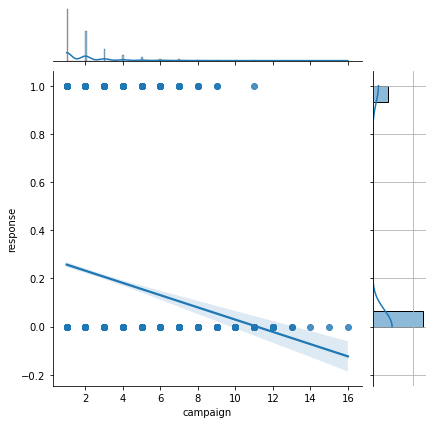

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

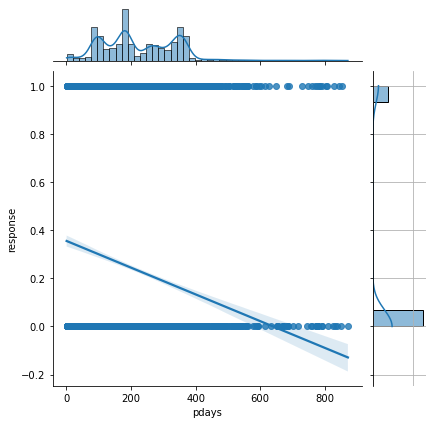

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

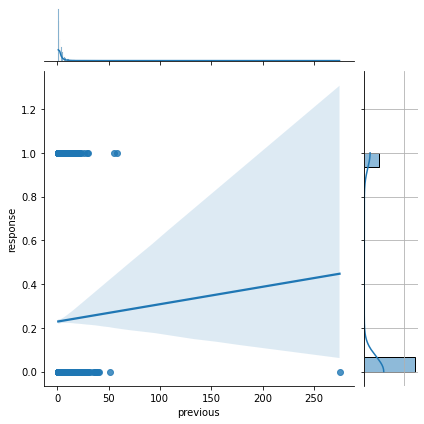

In [23]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(data[col],data["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

### Are the features about the previous campaign data useful?
#### No

### Are pdays and poutcome associated with the target? 
#### Yes

### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

#### pdays uses -1 as not value.These value as missing
#### Ignore these values in our mean/median calculations.
#### Keep it NaN,So pdays is -1, replace with NaN

### The necessary transformations for the categorical variables and the numeric variables

### Label Encoding of Categorical Variables

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
data1=data[obj_col].apply(LabelEncoder().fit_transform)

In [26]:
data1.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [27]:
data2=data1.join(data[num_col])

In [28]:
data2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [29]:
data2.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


In [30]:
import sklearn

In [31]:
sklearn.__version__

'0.24.2'

In [32]:
print(sklearn.__doc__)


Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



In [37]:
x=data2.drop('response',axis=1)
x.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [38]:
y=data2[["response"]]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel=LogisticRegression()

In [44]:
logmodel.fit(x_train,y_train)

C:\Users\infotech\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cv_score= cross_val_score(logmodel,x_train,y_train, cv=5)
np.mean(cv_score)

C:\Users\infotech\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

0.7780469341408025

In [47]:
prediction = logmodel.predict(x_test)

In [50]:
logmodel.predict_proba(x_test)

array([[0.7801914 , 0.2198086 ],
       [0.87506994, 0.12493006],
       [0.78483874, 0.21516126],
       ...,
       [0.9340151 , 0.0659849 ],
       [0.5821807 , 0.4178193 ],
       [0.90765226, 0.09234774]])

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.58      1652
weighted avg       0.75      0.79      0.74      1652



In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(prediction,y_test)

array([[1225,  299],
       [  54,   74]], dtype=int64)

In [57]:
from sklearn.metrics import f1_score

In [58]:
f1_score(prediction,y_test)

0.2954091816367265

### RFE

In [69]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
rfe=RFE(logmodel,5)
rfe.fit(x_train,y_train)

C:\Users\infotech\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [62]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [63]:
x_train.columns[rfe.support_]

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [65]:
cols=x_train.columns[rfe.support_]

In [66]:
logmodel.fit(x_train[cols],y_train)

C:\Users\infotech\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [72]:
predictions=logmodel.predict(x_test[cols])

In [73]:
f1_score(predictions,y_test)

0.5043478260869565

In [75]:
confusion_matrix(predictions,y_test)

array([[1222,  228],
       [  57,  145]], dtype=int64)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values("VIF", ascending = False)
vif

,Features,VIF
10,age,11.79
2,education,6.43
3,targeted,6.43
11,salary,5.38
16,pdays,5.21
1,marital,4.35
13,day,4.10
8,month,3.60
5,housing,3.14
15,campaign,2.87


#### Housing, loan, default, poutcome are imp feature from logistic regression model.

### Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [92]:
rfc.fit(x_train,y_train)

C:\Users\infotech\AppData\Local\Temp/ipykernel_9028/4070307935.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [93]:
cv1_score= cross_val_score(rfc,x_train,y_train, cv=5)
np.mean(cv1_score)

C:\Users\infotech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column

0.8392127176381529

In [94]:
y_pred = rfc.predict(x_test)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1279
           1       0.80      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [96]:
f1_score(y_test,y_pred)

0.5728987993138936

In [97]:
confusion_matrix(y_test,y_pred)

array([[1236,   43],
       [ 206,  167]], dtype=int64)

In [98]:
from sklearn.metrics import roc_auc_score

In [99]:
roc_auc_score(y_test,y_pred)

0.7070505819937242

### RFE

In [101]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(x_train,y_train)

C:\Users\infotech\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\infotech\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=42),
    n_features_to_select=5)

In [102]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [103]:
x_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [105]:
cols = x_train.columns[rfe1.support_]

In [106]:
rfc.fit(x_train[cols],y_train)

C:\Users\infotech\AppData\Local\Temp/ipykernel_9028/301221561.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train[cols],y_train)


RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [107]:
y_pred1 = rfc.predict(x_test[cols])

In [108]:
f1_score(y_pred1,y_test)

0.631911532385466

In [109]:
confusion_matrix(y_pred1,y_test)

array([[1219,  173],
       [  60,  200]], dtype=int64)

#### Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST.

### Compare the performance of the Random Forest and the logistic model –

### The next step after implementing a machine learning algorithm is to find out how effective is the model based on metric and datasets. Different performance metrics are used to evaluate different Machine Learning Algorithms. For example a classifier used to distinguish between images of different objects; we can use classification performance metrics such as, Precision score,accuracy score , recall score and Cross val score etc.

### The machine learning model cannot be simply tested using the training set, because the process of training the machine learning model has already tuned the predicted outcome to the training dataset. Therefore in order to estimate the generalization error, the model is required to test a dataset which it hasn’t seen yet; giving birth to the term testing dataset.

### Therefore for the purpose of testing the model, we would require a labelled dataset. This can be achieved by splitting the training dataset into training dataset and testing dataset. This can be achieved by various techniques.

### Which model has better performance on the test set?

### Model evaluation between random forest and logistic regression, our work focused on four distinct simulated datasets: (1) increasingthe variance in the explanatory and noise variables, (2) increasing the number of noise variables, (3) increasing the number of explanatory variables, (4) increasing the number of observations

### To benchmark and comparing classification scores between random forest and logistic regression, metrics such as accuracy, area under the curve, true positive rate, false positive rate, and precision were analyzed. To provide statistical quantification as to whether a difference in model performance is conclusive enough to state the difference is significant or if the observed difference is by random chance

## Logistic has got better accuracy score compared to random forset, hence we can say that it has better performance